<a href="https://colab.research.google.com/github/scarebats/Machine-Learning-2025/blob/main/UTS_2341720047_AHMAD%20NAUFAL%20ILHAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Ahmad Naufal Ilham

NIM : 2341720047

Kelas : TI-3G

Absen : 04

# **UTS - STUDI KASUS HOUSE PRICES DATASET**
[House Prices - Advanced Regression Techniques
](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

**Deskripsi:**

Dataset ini berisi atribut rumah (luas, tipe bangunan, kondisi, lokasi, dsb.)
yang dapat digunakan untuk eksplorasi fitur, penanganan missing values, dan clustering
rumah dengan karakteristik mirip.

- Langkah tambahan:
  - Fokus pada subset fitur numerik terlebih dahulu.
  - Coba buat fitur baru seperti “TotalArea = GrLivArea + TotalBsmtSF”.


# **LIBRARY**

In [136]:
# Menghubungkan Google Colab ke Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Import librari
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Clustering
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.manifold import TSNE

# ANN
from annoy import AnnoyIndex

# Mengatur agar output pandas menampilkan semua kolom
pd.set_option('display.max_columns', None)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **LOAD DATASET**

In [137]:
file_path = '/content/drive/MyDrive/Colab Notebooks/Machine_Learning_25/dataset/train.csv'

try:
    df = pd.read_csv(file_path)
    print("Dataset berhasil dimuat.")
except FileNotFoundError:
    print(f"Error: File tidak ditemukan di path: {file_path}")
    print("Pastikan path file sudah benar.")

df_numeric = df.select_dtypes(include=np.number)

print("\nInfo data numerik:")
df_numeric.info()


Dataset berhasil dimuat.

Info data numerik:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1452 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFul

# **PREPROCESING DATA**

In [138]:
# Membuat fitur baru 'TotalArea'
df_numeric['TotalArea'] = df_numeric['GrLivArea'] + df_numeric['TotalBsmtSF']

# Tampilkan 5 baris pertama untuk fitur-fitur terkait
print("Contoh fitur baru 'TotalArea':")
print(df_numeric[['GrLivArea', 'TotalBsmtSF', 'TotalArea']].head())

Contoh fitur baru 'TotalArea':
   GrLivArea  TotalBsmtSF  TotalArea
0       1710          856       2566
1       1262         1262       2524
2       1786          920       2706
3       1717          756       2473
4       2198         1145       3343


In [139]:
# Tangani missing values dengan imputasi mean
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df_numeric), columns=df_numeric.columns)
print(df_imputed.isnull().sum())

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
TotalArea        0
dtype: int64


In [140]:
# Standarisasi data
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_imputed), columns=df_imputed.columns)
df_scaled.head()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,TotalArea
0,-1.730865,0.073375,-0.229372,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.511418,0.575425,-0.288653,-0.944591,-0.459303,-0.793434,1.161852,-0.120242,0.370333,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,0.912210,-0.951226,1.021157,0.311725,0.351000,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777,0.347273,-0.008372
1,-1.728492,-0.872563,0.451936,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.574410,1.171992,-0.288653,-0.641228,0.466465,0.257140,-0.795163,-0.120242,-0.482512,-0.819964,3.948809,0.789741,-0.761621,0.163779,-0.211454,-0.318683,0.600495,-0.104483,0.311725,-0.060731,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439,0.007288,-0.059386
2,-1.726120,0.073375,-0.093110,0.073480,0.651479,-0.517200,0.984752,0.830215,0.323060,0.092907,-0.288653,-0.301643,-0.313369,-0.627826,1.189351,-0.120242,0.515013,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,-0.318683,0.600495,0.937776,0.311725,0.631726,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777,0.536154,0.161672
3,-1.723747,0.309859,-0.456474,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.574410,-0.499274,-0.288653,-0.061670,-0.687324,-0.521734,0.937276,-0.120242,0.383659,1.107810,-0.241061,-1.026041,-0.761621,0.163779,-0.211454,0.296763,0.600495,0.812705,1.650307,0.790804,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655,-0.515281,-0.121330
4,-1.721374,0.073375,0.633618,0.375148,1.374795,-0.517200,0.951632,0.733308,1.364570,0.463568,-0.288653,-0.174865,0.199680,-0.045611,1.617877,-0.120242,1.299326,1.107810,-0.241061,0.789741,1.227585,1.390023,-0.211454,1.527656,0.600495,0.896086,1.650307,1.698485,0.780197,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.138777,0.869843,0.935372


# **CLUSTERING**

In [141]:
# Terapkan K-Means
k = 5
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
labels_kmeans = kmeans.fit_predict(df_scaled)

# Tambahkan label cluster ke DataFrame
df_scaled['Cluster_KMeans'] = labels_kmeans

print(f"Hasil clustering K-Means (k={k}):")
print(df_scaled['Cluster_KMeans'].value_counts().sort_index())

Hasil clustering K-Means (k=5):
Cluster_KMeans
0    133
1    633
2     66
3    318
4    310
Name: count, dtype: int64


In [142]:
# Terapkan DBSCAN
# Nilai eps=5 dan min_samples=10 adalah tebakan awal; ini perlu di-tuning
# Anda mungkin perlu mencoba nilai eps yang berbeda (misal: 3, 5, 7)
dbscan = DBSCAN(eps=5.0, min_samples=10)
labels_dbscan = dbscan.fit_predict(df_scaled)

# Tambahkan label cluster ke DataFrame
df_scaled['Cluster_DBSCAN'] = labels_dbscan

print("Hasil clustering DBSCAN:")
print(df_scaled['Cluster_DBSCAN'].value_counts().sort_index())

Hasil clustering DBSCAN:
Cluster_DBSCAN
-1     245
 0    1200
 1      15
Name: count, dtype: int64


In [143]:
# 1. Evaluasi K-Means
s_kmeans = silhouette_score(df_scaled.drop(['Cluster_KMeans', 'Cluster_DBSCAN'], axis=1), labels_kmeans)
db_kmeans = davies_bouldin_score(df_scaled.drop(['Cluster_KMeans', 'Cluster_DBSCAN'], axis=1), labels_kmeans)

print(f"--- K-Means (k={k}) ---")
print(f"Silhouette Score: {s_kmeans:.4f}")
print(f"Davies-Bouldin Index: {db_kmeans:.4f}")

# 2. Evaluasi DBSCAN
# Penting: Kita harus mengevaluasi DBSCAN HANYA pada data yang BUKAN noise (-1)
# Jika hanya ada 1 cluster (selain noise), metrik ini tidak bisa dihitung.

mask_dbscan = labels_dbscan != -1
if np.sum(mask_dbscan) > 0 and len(set(labels_dbscan[mask_dbscan])) > 1:
    s_dbscan = silhouette_score(df_scaled[mask_dbscan].drop(['Cluster_KMeans', 'Cluster_DBSCAN'], axis=1), labels_dbscan[mask_dbscan])
    db_dbscan = davies_bouldin_score(df_scaled[mask_dbscan].drop(['Cluster_KMeans', 'Cluster_DBSCAN'], axis=1), labels_dbscan[mask_dbscan])

    print(f"\n--- DBSCAN (Non-Noise points only) ---")
    print(f"Silhouette Score: {s_dbscan:.4f}")
    print(f"Davies-Bouldin Index: {db_dbscan:.4f}")
else:
    print("\n--- DBSCAN ---")
    print("Tidak dapat menghitung metrik DBSCAN (kemungkinan semua data adalah noise atau hanya 1 cluster terbentuk).")

--- K-Means (k=5) ---
Silhouette Score: 0.1067
Davies-Bouldin Index: 2.2754

--- DBSCAN (Non-Noise points only) ---
Silhouette Score: 0.1766
Davies-Bouldin Index: 1.4058


In [144]:
# Inisialisasi t-SNE
# n_components=2 artinya kita reduksi ke 2D
tsne = TSNE(n_components=2, perplexity=30, random_state=42, n_iter=300)

# Terapkan t-SNE ke data Anda
tsne_results = tsne.fit_transform(data_for_ann)

print("t-SNE selesai.")

# Buat DataFrame baru untuk hasil plot 2D
df_tsne = pd.DataFrame(data=tsne_results, columns=['tsne_x', 'tsne_y'])

# Tambahkan label cluster yang sudah Anda dapatkan sebelumnya
df_tsne['Cluster_KMeans'] = labels_kmeans
df_tsne['Cluster_DBSCAN'] = labels_dbscan

print("\nData siap untuk divisualisasikan:")
df_tsne.head()

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


t-SNE selesai.

Data siap untuk divisualisasikan:


,tsne_x,tsne_y,Cluster_KMeans,Cluster_DBSCAN
0,4.894512,-2.267227,3,0
1,-0.472606,-0.767009,4,0
2,5.164625,-2.167883,3,0
3,-8.306130,3.963321,1,-1
4,6.796616,-0.304275,0,0


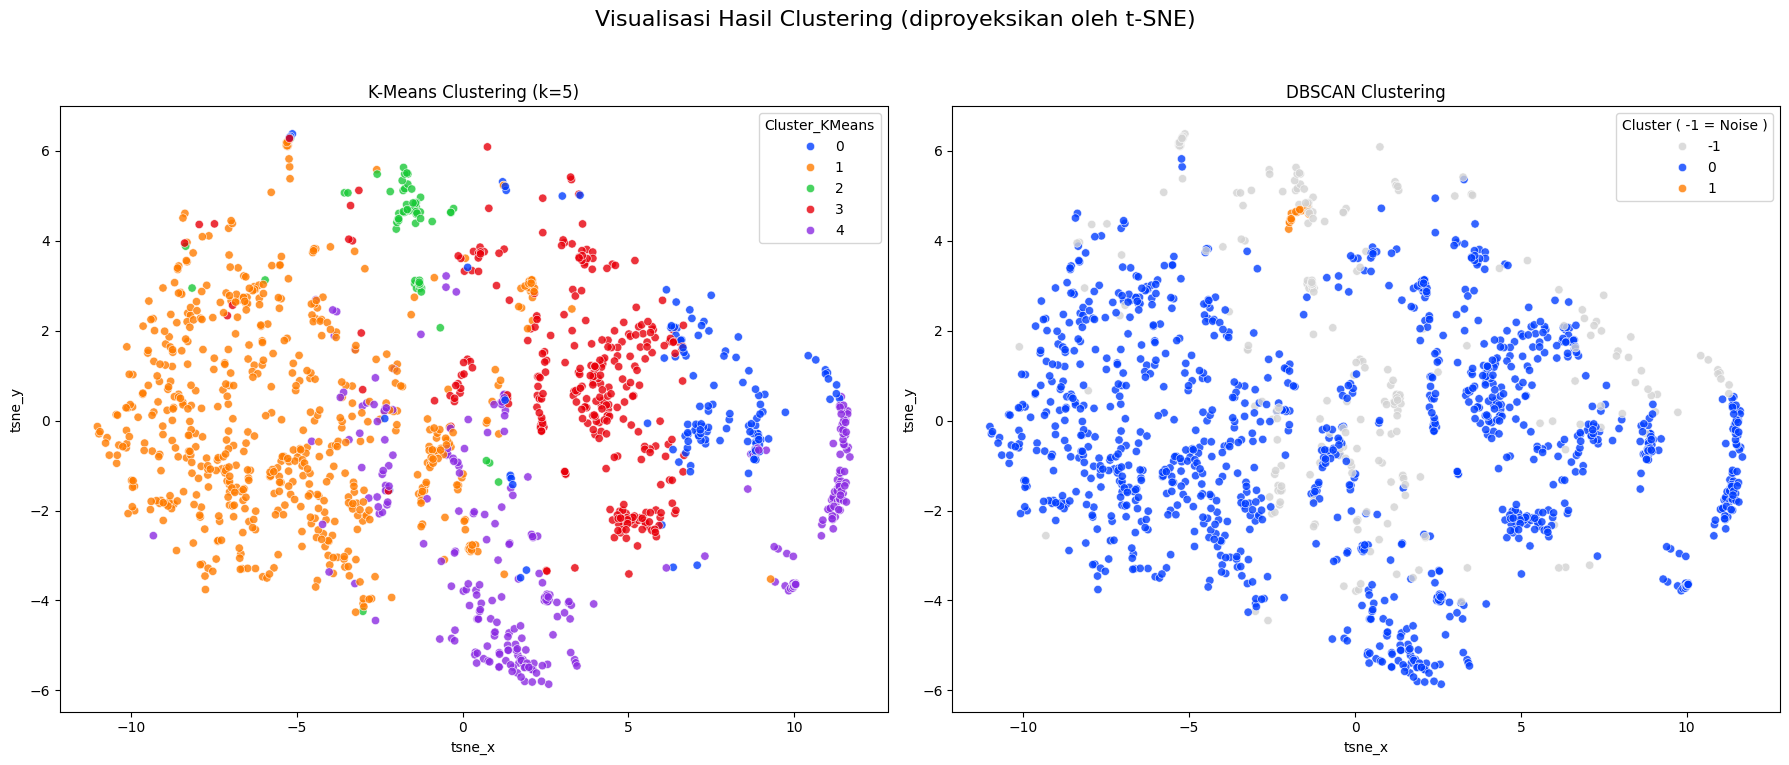

In [145]:
# Siapkan 2 plot
fig, axes = plt.subplots(1, 2, figsize=(18, 8))
fig.suptitle('Visualisasi Hasil Clustering (diproyeksikan oleh t-SNE)', fontsize=16)

# --- Plot K-Means ---
# (Sesuai hasil Anda, k=5)
sns.scatterplot(
    data=df_tsne,
    x='tsne_x',
    y='tsne_y',
    hue='Cluster_KMeans', # Warnai berdasarkan K-Means
    palette='bright',     # Skema warna
    legend='full',
    alpha=0.8,
    ax=axes[0]
)
axes[0].set_title(f'K-Means Clustering (k={k})')

# --- Plot DBSCAN ---

# Buat palet warna khusus: -1 (Noise) akan berwarna abu-abu
unique_labels = sorted(df_tsne['Cluster_DBSCAN'].unique())
colors = ['lightgray' if label == -1 else sns.color_palette('bright', len(unique_labels)-1)[i-1 if -1 in unique_labels else i]
          for i, label in enumerate(unique_labels)]
palette_dbscan = dict(zip(unique_labels, colors))

sns.scatterplot(
    data=df_tsne,
    x='tsne_x',
    y='tsne_y',
    hue='Cluster_DBSCAN', # Warnai berdasarkan DBSCAN
    palette=palette_dbscan,
    legend='full',
    alpha=0.8,
    ax=axes[1]
)
axes[1].set_title('DBSCAN Clustering')
axes[1].legend(title='Cluster ( -1 = Noise )')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# **APPROXIMATE NEAREST NEIGHBOR (ANN)**


In [146]:
# Data yang akan di-indeks
data_for_ann = df_scaled.drop(['Cluster_KMeans', 'Cluster_DBSCAN'], axis=1)

# Ambil jumlah dimensi (fitur)
f = data_for_ann.shape[1]

# Inisialisasi Annoy Index
# 'euclidean' adalah metrik jarak yang umum, 'angular' juga bisa
t = AnnoyIndex(f, 'euclidean')

# Tambahkan semua item (data point) ke index
for i in range(len(data_for_ann)):
    t.add_item(i, data_for_ann.iloc[i])

# Bangun index. 10 adalah jumlah 'trees'. Semakin banyak, semakin akurat tapi lambat.
t.build(10)

/tmp/ipython-input-1705824314.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  t.add_item(i, data_for_ann.iloc[i])


True

In [147]:
# Tentukan query points (berdasarkan index data asli)
query_indices = [4, 11, 20]
k_neighbors = 5 # Jumlah tetangga yang ingin dicari

print("\n--- Hasil Pencarian ANN (Annoy) ---")

for query_id in query_indices:
    # Cari K+1 tetangga (karena akan menemukan dirinya sendiri)
    # include_distances=True untuk mendapatkan nilai jaraknya
    (neighbors, distances) = t.get_nns_by_item(query_id, k_neighbors + 1, include_distances=True)

    # Kita filter query_id itu sendiri dari hasil
    actual_neighbors = []
    actual_distances = []
    for i in range(len(neighbors)):
        if neighbors[i] != query_id:
            actual_neighbors.append(neighbors[i])
            actual_distances.append(distances[i])

    print(f"\n==========================================")
    print(f"Query Point Index: {query_id}")
    print(f"(Rumah ini ada di K-Means Cluster: {df_scaled.loc[query_id, 'Cluster_KMeans']})")
    print(f"------------------------------------------")
    print(f"Daftar Tetangga Terdekat (Index):")
    print(actual_neighbors)
    print(f"\nNilai Jarak Kemiripan (Euclidean):")
    # Format jarak agar lebih mudah dibaca
    print([round(d, 4) for d in actual_distances])
    print(f"==========================================")


--- Hasil Pencarian ANN (Annoy) ---

Query Point Index: 4
(Rumah ini ada di K-Means Cluster: 0)
------------------------------------------
Daftar Tetangga Terdekat (Index):
[554, 524, 321, 619, 167]

Nilai Jarak Kemiripan (Euclidean):
[3.0485, 3.3332, 3.4253, 3.5003, 3.7286]

Query Point Index: 11
(Rumah ini ada di K-Means Cluster: 0)
------------------------------------------
Daftar Tetangga Terdekat (Index):
[619, 321, 4, 1142, 877]

Nilai Jarak Kemiripan (Euclidean):
[4.0124, 4.1701, 4.6509, 4.7087, 4.7125]

Query Point Index: 20
(Rumah ini ada di K-Means Cluster: 0)
------------------------------------------
Daftar Tetangga Terdekat (Index):
[320, 65, 35, 408, 702]

Nilai Jarak Kemiripan (Euclidean):
[2.1994, 2.4156, 2.7722, 3.3506, 3.4673]


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


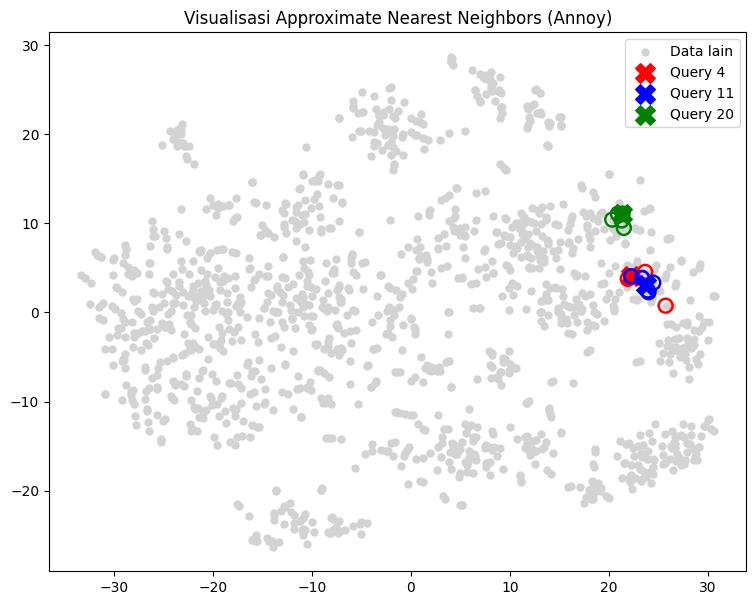

In [148]:
# Pastikan data yang digunakan sama dengan df_scaled tanpa kolom cluster
data_array = df_scaled.drop(columns=['Cluster_KMeans'], errors='ignore').values

# Reduksi dimensi ke 2D
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=500)
data_2d = tsne.fit_transform(data_array)

plt.figure(figsize=(9,7))
plt.scatter(data_2d[:, 0], data_2d[:, 1], c='lightgray', s=25, label='Data lain')

# Warna unik untuk setiap query
colors = ['red', 'blue', 'green', 'orange', 'purple']

for i, query_id in enumerate(query_indices):
    neighbors, distances = t.get_nns_by_item(query_id, k_neighbors + 1, include_distances=True)

    # Filter dirinya sendiri dari hasil
    actual_neighbors = [n for n in neighbors if n != query_id]

    # Plot query point
    plt.scatter(data_2d[query_id, 0], data_2d[query_id, 1],
                color=colors[i % len(colors)], marker='X', s=200,
                label=f'Query {query_id}')

    # Plot tetangga terdekat
    plt.scatter(data_2d[actual_neighbors, 0], data_2d[actual_neighbors, 1],
                edgecolor=colors[i % len(colors)], facecolor='none', s=100,
                linewidth=1.8)

plt.title("Visualisasi Approximate Nearest Neighbors (Annoy)")
plt.legend()
plt.show()